Import library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import pyplot as plt
from visualization_snippet import *

!pip install kaggle

os.environ['KAGGLE_USERNAME'] = "zououoz"
os.environ['KAGGLE_KEY'] = "73ebee74b5be2a3cdcff3f1e8a278529"

import kaggle

Mendownload dataset lalu melakukan unzip (karena data yang didownload berupa file zip)

In [3]:
!kaggle datasets download -d divyansh22/february-flight-delay-prediction --force
!unzip -q /content/february-flight-delay-prediction.zip

 80% 17.0M/21.3M [00:01<00:00, 10.4MB/s]
100% 21.3M/21.3M [00:01<00:00, 12.7MB/s]


## **Data Exploration**

In [4]:
df= pd.read_csv('Feb_2020_ontime.csv')

df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,6,MQ,20398,MQ,N269NN,3825,13930,1393007,ORD,...,TUL,1646.0,0.0,1600-1659,1820.0,0.0,0.0,0.0,585.0,NaN
1,1,6,MQ,20398,MQ,N908AE,3829,12478,1247805,JFK,...,BNA,1336.0,0.0,1300-1359,1458.0,0.0,0.0,0.0,765.0,NaN
2,1,6,MQ,20398,MQ,N663AR,3831,11953,1195302,GNV,...,MIA,844.0,0.0,0800-0859,1020.0,1.0,0.0,0.0,294.0,NaN
3,1,6,MQ,20398,MQ,N618AE,3833,11298,1129806,DFW,...,SJT,852.0,0.0,0800-0859,955.0,0.0,0.0,0.0,229.0,NaN
4,1,6,MQ,20398,MQ,N618AE,3833,14842,1484202,SJT,...,DFW,1024.0,0.0,1000-1059,1132.0,0.0,0.0,0.0,229.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574263,29,6,DL,19790,DL,N335DN,3122,11298,1129806,DFW,...,ATL,820.0,0.0,0800-0859,1118.0,0.0,0.0,0.0,731.0,NaN
574264,29,6,DL,19790,DL,N337DN,3124,14107,1410702,PHX,...,SLC,652.0,0.0,0600-0659,820.0,0.0,0.0,0.0,507.0,NaN
574265,29,6,DL,19790,DL,N915DN,3125,11540,1154005,ELP,...,ATL,557.0,0.0,0600-0659,1037.0,0.0,0.0,0.0,1282.0,NaN
574266,29,6,DL,19790,DL,N995DL,3130,10397,1039707,ATL,...,CLE,1111.0,0.0,1100-1159,1254.0,0.0,0.0,0.0,554.0,NaN


In [5]:
df= df.iloc[:,:-1]

Berikut penjelasan masing-masing kolom

**DAY_OF_MONTH** : Day of Month

**DAY_OF_WEEK** : Day of Week starting from Monday

**OP_UNIQUE_CARRIER** : Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2).

**OP_CARRIER_AIRLINE_ID** : An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation. 

**OP_CARRIER** : Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. **- Kode untuk membedakan maskapai penerbangan**

**TAIL_NUM** : Tail Number **- Kode spesifik untuk mengidentifikasi pesawat**

**OP_CARRIER_FL_NUM** : Flight Number

**ORIGIN_AIRPORT_ID** : Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.

**ORIGIN_AIRPORT_SEQ_ID** : Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time.

**ORIGIN** : Origin Airport

**DEST_AIRPORT_ID** : Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.

**DEST_AIRPORT_SEQ_ID** : Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time.

**DEST** : Destination Airport

**DEP_TIME** : Actual Departure Time (local **time** : hhmm)

**DEP_DEL15** : Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

**DEP_TIME_BLK** : Departure Time Block, Hourly Intervals

**ARR_TIME** : Actual Arrival Time (local **time** : hhmm)

**ARR_DEL15** : Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)

**CANCELLED** : Cancelled Flight Indicator (1=Yes, 0=No)

**DIVERTED** : Diverted Flight Indicator (1=Yes, 0=No)

**DISTANCE** : Distance between airports (miles)

In [6]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
count,574268.000000,574268.000000,574268.000000,574268.000000,574268.000000,5.742680e+05,574268.000000,5.742680e+05,569330.000000,569317.000000,568981.000000,568076.000000,574268.000000,574268.000000,574268.000000
mean,15.179477,3.989280,19998.101306,2610.885233,12658.021716,1.265806e+06,12658.143861,1.265818e+06,1332.607906,0.144352,1478.641691,0.148952,0.008942,0.001841,795.735522
std,8.295999,1.988345,374.629506,1810.422710,1524.563452,1.524561e+05,1524.594853,1.524592e+05,498.667304,0.351447,527.628341,0.356041,0.094138,0.042863,582.960817
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013506e+06,10135.000000,1.013506e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000
25%,8.000000,2.000000,19790.000000,1063.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,918.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,369.000000
50%,15.000000,4.000000,19977.000000,2174.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1513.000000,0.000000,0.000000,0.000000,641.000000
75%,22.000000,6.000000,20378.000000,4100.000000,14027.000000,1.402702e+06,14027.000000,1.402702e+06,1741.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,1036.000000
max,29.000000,7.000000,20452.000000,6803.000000,16869.000000,1.686901e+06,16869.000000,1.686901e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,5095.000000


In [7]:
for i in df.select_dtypes(include=object):
    print(i)
    print(df[i].unique(),end= '\n\n')

OP_UNIQUE_CARRIER
['MQ' 'B6' 'OH' 'AA' 'NK' 'YX' 'F9' 'DL' 'YV' 'EV' 'HA' '9E' 'G4' 'UA'
 'AS' 'WN' 'OO']

OP_CARRIER
['MQ' 'B6' 'OH' 'AA' 'NK' 'YX' 'F9' 'DL' 'YV' 'EV' 'HA' '9E' 'G4' 'UA'
 'AS' 'WN' 'OO']

TAIL_NUM
['N269NN' 'N908AE' 'N663AR' ... 'N36444' 'N978DL' 'N854NW']

ORIGIN
['ORD' 'JFK' 'GNV' 'DFW' 'SJT' 'MSO' 'ROC' 'BHM' 'MIA' 'XNA' 'TLH' 'AEX'
 'LGA' 'CMH' 'CMI' 'RIC' 'CHO' 'BWI' 'CLT' 'SGF' 'SUX' 'ELP' 'LEX' 'SAT'
 'GRK' 'MEM' 'GRI' 'ABQ' 'AVL' 'BUF' 'GGG' 'RST' 'CLL' 'GSO' 'CHS' 'SPI'
 'BNA' 'AGS' 'BMI' 'DCA' 'HRL' 'DLH' 'CVG' 'GSP' 'CLE' 'JLN' 'ORF' 'SCE'
 'ILM' 'CID' 'SHV' 'CRP' 'DSM' 'DTW' 'DBQ' 'EWR' 'ABE' 'FNT' 'FSM' 'TYR'
 'MTJ' 'PIA' 'FWA' 'LIT' 'DAY' 'MLU' 'ALO' 'GRB' 'TXK' 'FSD' 'HOU' 'HSV'
 'IAH' 'ICT' 'JAX' 'LSE' 'LYH' 'MCI' 'MFE' 'MSP' 'OMA' 'GJT' 'SDF' 'BTR'
 'LRD' 'BZN' 'AMA' 'FLL' 'SJU' 'LAS' 'LGB' 'SFO' 'BOS' 'SAN' 'LAX' 'TPA'
 'MCO' 'BTV' 'RNO' 'HDN' 'PBI' 'SLC' 'MSY' 'ALB' 'ATL' 'DEN' 'PHX' 'BQN'
 'OAK' 'PSP' 'PHL' 'SRQ' 'RDU' 'SEA' 'SMF' 'BDL' 'SYR' 'BUR

In [8]:
Counter(df['DEP_DEL15']).most_common(2)

[(0.0, 487135), (1.0, 82182)]

## **Preprocessing**

In [9]:
delayed_cols= df['DEP_DEL15']
df.drop('DEP_DEL15', axis='columns', inplace=True)

df['DELAYED']= delayed_cols

df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DELAYED
0,1,6,MQ,20398,MQ,N269NN,3825,13930,1393007,ORD,...,1537002,TUL,1646.0,1600-1659,1820.0,0.0,0.0,0.0,585.0,0.0
1,1,6,MQ,20398,MQ,N908AE,3829,12478,1247805,JFK,...,1069302,BNA,1336.0,1300-1359,1458.0,0.0,0.0,0.0,765.0,0.0
2,1,6,MQ,20398,MQ,N663AR,3831,11953,1195302,GNV,...,1330303,MIA,844.0,0800-0859,1020.0,1.0,0.0,0.0,294.0,0.0
3,1,6,MQ,20398,MQ,N618AE,3833,11298,1129806,DFW,...,1484202,SJT,852.0,0800-0859,955.0,0.0,0.0,0.0,229.0,0.0
4,1,6,MQ,20398,MQ,N618AE,3833,14842,1484202,SJT,...,1129806,DFW,1024.0,1000-1059,1132.0,0.0,0.0,0.0,229.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574263,29,6,DL,19790,DL,N335DN,3122,11298,1129806,DFW,...,1039707,ATL,820.0,0800-0859,1118.0,0.0,0.0,0.0,731.0,0.0
574264,29,6,DL,19790,DL,N337DN,3124,14107,1410702,PHX,...,1486903,SLC,652.0,0600-0659,820.0,0.0,0.0,0.0,507.0,0.0
574265,29,6,DL,19790,DL,N915DN,3125,11540,1154005,ELP,...,1039707,ATL,557.0,0600-0659,1037.0,0.0,0.0,0.0,1282.0,0.0
574266,29,6,DL,19790,DL,N995DL,3130,10397,1039707,ATL,...,1104205,CLE,1111.0,1100-1159,1254.0,0.0,0.0,0.0,554.0,0.0


**Feature Selection**

In [10]:
Counter(df['TAIL_NUM']).most_common()[-10:]

[('N785UA', 1),
 ('N218UA', 1),
 ('N798UA', 1),
 ('N722AN', 1),
 ('N2136U', 1),
 ('N440SW', 1),
 ('N184JB', 1),
 ('N8974C', 1),
 ('N658UA', 1),
 ('N36444', 1)]

In [11]:
(df['OP_UNIQUE_CARRIER']== df['OP_CARRIER']).unique()

array([ True])

In [12]:
df.drop(['OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'CANCELLED', 'DIVERTED', 'ARR_TIME', 'ARR_DEL15', 'DEP_TIME_BLK'], axis='columns', inplace=True)

In [13]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DISTANCE,DELAYED
0,1,6,MQ,ORD,TUL,1646.0,585.0,0.0
1,1,6,MQ,JFK,BNA,1336.0,765.0,0.0
2,1,6,MQ,GNV,MIA,844.0,294.0,0.0
3,1,6,MQ,DFW,SJT,852.0,229.0,0.0
4,1,6,MQ,SJT,DFW,1024.0,229.0,0.0
...,...,...,...,...,...,...,...,...
574263,29,6,DL,DFW,ATL,820.0,731.0,0.0
574264,29,6,DL,PHX,SLC,652.0,507.0,0.0
574265,29,6,DL,ELP,ATL,557.0,1282.0,0.0
574266,29,6,DL,ATL,CLE,1111.0,554.0,0.0


**Handling Null Value**

In [14]:
df.isnull().sum()

DAY_OF_MONTH       0
DAY_OF_WEEK        0
OP_CARRIER         0
ORIGIN             0
DEST               0
DEP_TIME        4938
DISTANCE           0
DELAYED         4951
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

DAY_OF_MONTH    0
DAY_OF_WEEK     0
OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME        0
DISTANCE        0
DELAYED         0
dtype: int64

In [16]:
df.reset_index(inplace=True, drop=True)

In [17]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DISTANCE,DELAYED
0,1,6,MQ,ORD,TUL,1646.0,585.0,0.0
1,1,6,MQ,JFK,BNA,1336.0,765.0,0.0
2,1,6,MQ,GNV,MIA,844.0,294.0,0.0
3,1,6,MQ,DFW,SJT,852.0,229.0,0.0
4,1,6,MQ,SJT,DFW,1024.0,229.0,0.0
...,...,...,...,...,...,...,...,...
569312,29,6,DL,DFW,ATL,820.0,731.0,0.0
569313,29,6,DL,PHX,SLC,652.0,507.0,0.0
569314,29,6,DL,ELP,ATL,557.0,1282.0,0.0
569315,29,6,DL,ATL,CLE,1111.0,554.0,0.0


**Handling Outlier**

In [18]:
# Fungsi untuk mengembalikan daftar kolom kategorik pada dataframe yang diberikan
def categorical_cols(df):
    return df.select_dtypes(object).columns

# Fungsi untuk mengembalikan daftar kolom numerik pada dataframe yang diberikan
def numerical_cols(df):
    return df.select_dtypes(np.number).columns

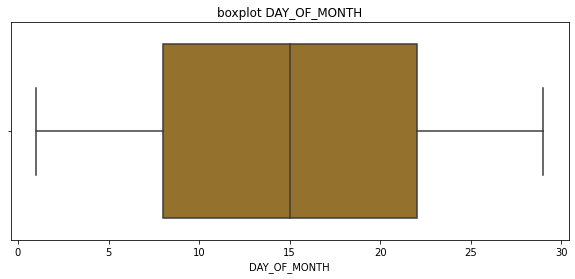

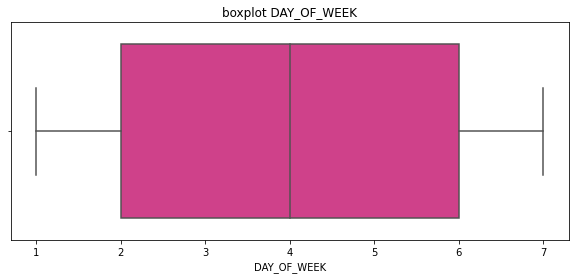

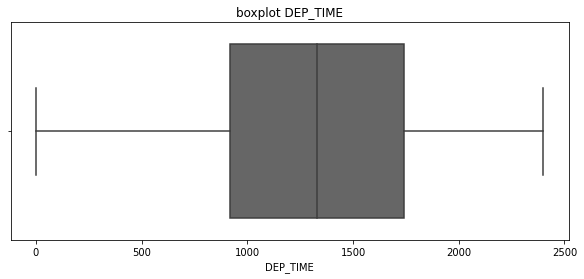

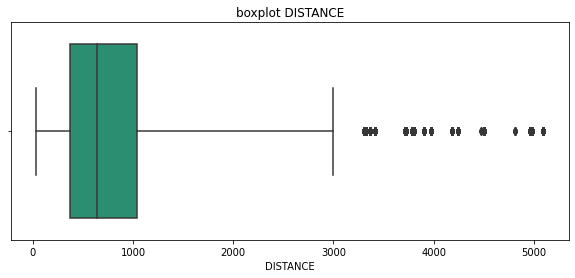

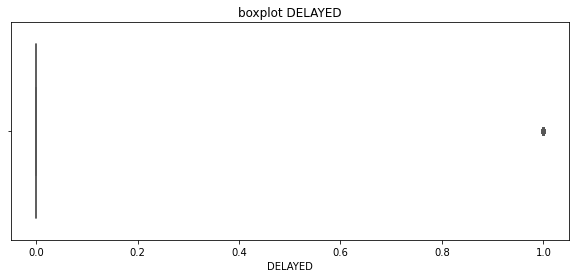

In [19]:
for i in numerical_cols(df):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[i], whis=3, color=get_random_cmap('Dark2', color_num=1))
    plt.title(f'boxplot {i}')
    plt.show()

In [20]:
# Mendefinisikan quantile 1 dan 3  sebesar 0.25 dan 0.75
Q1= df['DISTANCE'].quantile(0.25)
Q3= df['DISTANCE'].quantile(0.75)

# Mendefinisikan variabel iqr
IQR= Q3-Q1

# Menampilkan variabel q1,q3, dan iqr
Q1, Q3, IQR

(369.0, 1041.0, 672.0)

In [21]:
whis= 3

# Menentukan batas bawah dan batas atas
batas_bawah= 0 if(Q1 - (whis*IQR) <=0) else Q1
batas_atas= Q3 + (whis*IQR)

# Menampilkan batas bawah dan batas atas
batas_bawah, batas_atas

(0, 3057.0)

In [22]:
df= df[(df['DISTANCE']>= batas_bawah) & (df['DISTANCE']<= batas_atas)]
df.reset_index(inplace=True, drop=True)
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DISTANCE,DELAYED
0,1,6,MQ,ORD,TUL,1646.0,585.0,0.0
1,1,6,MQ,JFK,BNA,1336.0,765.0,0.0
2,1,6,MQ,GNV,MIA,844.0,294.0,0.0
3,1,6,MQ,DFW,SJT,852.0,229.0,0.0
4,1,6,MQ,SJT,DFW,1024.0,229.0,0.0
...,...,...,...,...,...,...,...,...
568264,29,6,DL,DFW,ATL,820.0,731.0,0.0
568265,29,6,DL,PHX,SLC,652.0,507.0,0.0
568266,29,6,DL,ELP,ATL,557.0,1282.0,0.0
568267,29,6,DL,ATL,CLE,1111.0,554.0,0.0


**Label Encoding**

In [23]:
Le= LabelEncoder()

for i in categorical_cols(df): 
    df[i]= Le.fit_transform(df[i])
    
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DISTANCE,DELAYED
0,1,6,9,238,334,1646.0,585.0,0.0
1,1,6,9,170,40,1336.0,765.0,0.0
2,1,6,9,129,212,844.0,294.0,0.0
3,1,6,9,90,308,852.0,229.0,0.0
4,1,6,9,308,90,1024.0,229.0,0.0
...,...,...,...,...,...,...,...,...
568264,29,6,4,90,18,820.0,731.0,0.0
568265,29,6,4,252,310,652.0,507.0,0.0
568266,29,6,4,104,18,557.0,1282.0,0.0
568267,29,6,4,18,67,1111.0,554.0,0.0


**Normalisasi**

In [24]:
df[df.columns[:-1]]= StandardScaler().fit_transform(df[df.columns[:-1]])

df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DISTANCE,DELAYED
0,-1.713621,1.011066,0.094438,0.734685,1.750670,0.628727,-0.364655,0.0
1,-1.713621,1.011066,0.094438,0.014775,-1.361380,0.007153,-0.047441,0.0
2,-1.713621,1.011066,0.094438,-0.419288,0.459275,-0.979347,-0.877483,0.0
3,-1.713621,1.011066,0.094438,-0.832177,1.475455,-0.963306,-0.992032,0.0
4,-1.713621,1.011066,0.094438,1.475768,-0.832119,-0.618432,-0.992032,0.0
...,...,...,...,...,...,...,...,...
568264,1.660384,1.011066,-0.846224,-0.832177,-1.594254,-1.027469,-0.107360,0.0
568265,1.660384,1.011066,-0.846224,0.882902,1.496625,-1.364322,-0.502114,0.0
568266,1.660384,1.011066,-0.846224,-0.683960,-1.594254,-1.554805,0.863666,0.0
568267,1.660384,1.011066,-0.846224,-1.594434,-1.075579,-0.443990,-0.419286,0.0


## **Training Model**

In [25]:
X= df.drop('DELAYED', axis='columns')
y= df['DELAYED']

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) 

In [26]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='minority')
# X_sm, y_sm = smote.fit_resample(x_train, y_train)

# print(Counter(y_sm))

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
model= keras.Sequential([
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

reduce_lr_on_plateau_callback= keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor= 0.75, patience=2, min_lr=0.00005, min_delta=0.005)

In [29]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=10, batch_size=128, callbacks=[reduce_lr_on_plateau_callback])

Epoch 1/10
3108/3108 [==============================] - 49s 13ms/step - loss: 0.3891 - accuracy: 0.8564 - lr: 0.0100
Epoch 2/10
3108/3108 [==============================] - 38s 12ms/step - loss: 0.3776 - accuracy: 0.8575 - lr: 0.0100
Epoch 3/10
3108/3108 [==============================] - 39s 13ms/step - loss: 0.3743 - accuracy: 0.8587 - lr: 0.0100
Epoch 4/10
3108/3108 [==============================] - 38s 12ms/step - loss: 0.3689 - accuracy: 0.8604 - lr: 0.0075
Epoch 5/10
3108/3108 [==============================] - 38s 12ms/step - loss: 0.3668 - accuracy: 0.8613 - lr: 0.0075
Epoch 6/10
3108/3108 [==============================] - 38s 12ms/step - loss: 0.3640 - accuracy: 0.8627 - lr: 0.0056
Epoch 7/10
3108/3108 [==============================] - 37s 12ms/step - loss: 0.3631 - accuracy: 0.8630 - lr: 0.0056
Epoch 8/10
3108/3108 [==============================] - 37s 12ms/step - loss: 0.3618 - accuracy: 0.8634 - lr: 0.0056
Epoch 9/10
3108/3108 [==============================] - 38s 12ms

In [31]:
model.save_weights('flights.params')

In [32]:
model.evaluate(x_test, y_test)

5328/5328 [==============================] - 17s 3ms/step - loss: 0.3644 - accuracy: 0.8624


[0.3643610179424286, 0.8623541593551636]

In [33]:
model.optimizer.lr

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.0031640623>

In [34]:
a= 0.1
for i in range(10):
    a*= 0.5
    print(a)

0.05
0.025
0.0125
0.00625
0.003125
0.0015625
0.00078125
0.000390625
0.0001953125
9.765625e-05


In [35]:
# plt.style.use('fivethirtyeight')
# binary_dataframe_comparison(df, 'DELAYED', bar_normalize=False)